## CS 211 - COMPUTER ARCHITECTURE 
### Assignment 5

<img src="https://iitgoa.ac.in/hpcnc_courses/course4/iitgoa.png" width=300>

- Author: **ADARSH ANAND**
- Roll No. 2003101
- CSE

Date of Submission: 7 April 2022


## Importing Libraries

In [1]:
import numpy as np # For fast arrays and matrices operations
import itertools # For fast combinations generation
import matplotlib.pyplot as plt # For plotting graphs

## Define delay list

In [2]:
delays = [i for i in range(10, 60, 10)] # Array to store the delays
permut_delay = list(itertools.product(delays, repeat=5)) # Get all the permutations of the delays

## Creating 3 stage pipeline 

In [3]:
stage_3_type_a = [] # Array to store the accuracy of the stage 3 type A
stage_3_type_b = [] # Array to store the accuracy of the stage 3 type B

for permut in permut_delay:
    # Iterating through the permutations one by one

    # Calculate the time delay for all 5 stages (IF+ID+EXE+MEM+WB)
    time_taken = [permut[0]+permut[1], permut[2], permut[3]+permut[4]]
    max_time = max(time_taken) # Get the maximum time

    time_a = 15*max_time 
    time_b = 10*max_time

    # Store instruction 
    # IF+ID+EXE+MEM 4 stages
    time_taken = [permut[0]+permut[1], permut[2], permut[3]]
    max_time = max(time_taken)

    time_a += 20*max_time
    time_b += 10*max_time

    # R instruction
    # IF+ID+MEM+WB 4 stages
    time_taken = [permut[0]+permut[1], permut[2], permut[4]]
    max_time = max(time_taken)

    time_a += 40*max_time
    time_b += 60*max_time

    # Branch instruction
    # IF+ID+EX
    time_taken = [permut[0]+permut[1], permut[2]]
    max_time = max(time_taken)

    time_a += 25*max_time
    time_b += 20*max_time

    time_a /= 100
    time_b /= 100

    stage_3_type_a.append(time_a)
    stage_3_type_b.append(time_b)


## Plotting the 3 stage pipeline (Type A and B)

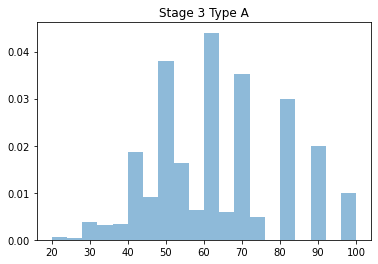

In [4]:
plt.hist(stage_3_type_a, bins=20, density=True, label='Type A', alpha=0.5)
plt.title("Stage 3 Type A");

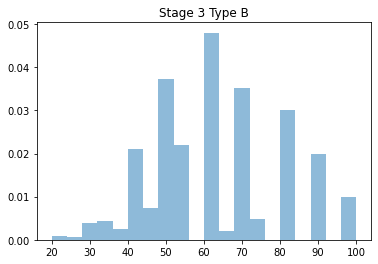

In [5]:
plt.hist(stage_3_type_b, bins=20, density=True, label='Type A', alpha=0.5)
plt.title("Stage 3 Type B");

## Creating the 4 stage pipeline (Type A and B)

In [6]:
stage_4_type_a = []
stage_4_type_b = []

for permut in permut_delay:
    # Iterate through the permutations one by one
    
    # Load instruction
    # All 5 stages (IF+ID+EXE+MEM+WB)
    time_taken = [permut[0], permut[1], permut[2], permut[3]+permut[4]]
    max_time = max(time_taken)

    net_time_a = 15*max_time
    net_time_b = 10*max_time

    # Store instruction
    # IF+ID+EXE+MEM 4 stages
    time_taken = [permut[0], permut[1], permut[2], permut[3]]
    max_time = max(time_taken)

    net_time_a += 20*max_time
    net_time_b += 10*max_time

    # R instruction
    # IF+ID+MEM+WB 4 stages
    time_taken = [permut[0], permut[1], permut[2], permut[4]]
    max_time = max(time_taken)

    net_time_a += 40*max_time
    net_time_b += 60*max_time

    # Branch instruction
    # IF+ID+EX
    time_taken = [permut[0], permut[1], permut[2]]
    max_time = max(time_taken)

    net_time_a += 25*max_time
    net_time_b += 20*max_time

    net_time_a /= 100 # Convert to percentage
    net_time_b /= 100 # Convert to percentage

    stage_4_type_a.append(net_time_a) # Store the accuracy
    stage_4_type_b.append(net_time_b)


## Plotting the 4 stage pipeline (Type A and B)

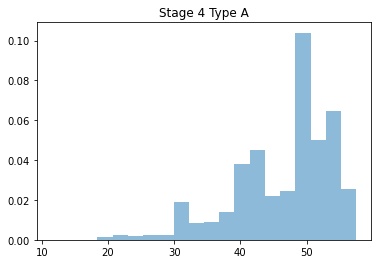

In [7]:
plt.hist(stage_4_type_a, bins=20, density=True, label='Type A', alpha=0.5)
plt.title("Stage 4 Type A");

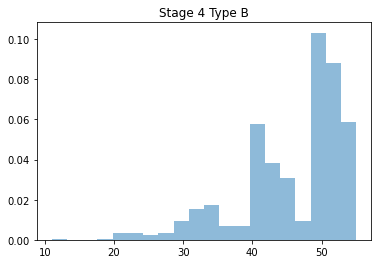

In [8]:
plt.hist(stage_4_type_b, bins=20, density=True, label='Type A', alpha=0.5)
plt.title("Stage 4 Type B");

## Creating the 5 stage pipeline (Type A and B)

In [9]:
# 5 stage pipeline

stage_5_type_a = []
stage_5_type_b = []

for permut in permut_delay:
    # Iterate through the permutations one by one
    
    # Load instruction
    # All 5 stages
    time_taken = [permut[0], permut[1], permut[2], permut[3], permut[4]]
    max_time = max(time_taken)

    net_time_a = 15*max_time
    net_time_b = 10*max_time

    # Store instruction
    # if+id+ex+mem
    time_taken = [permut[0], permut[1], permut[2], permut[3]]
    max_time = max(time_taken)

    net_time_a += 20*max_time
    net_time_b += 10*max_time

    # R instruction
    # if+id+ex+wb
    time_taken = [permut[0], permut[1], permut[2], permut[4]]
    max_time = max(time_taken)

    net_time_a += 40*max_time
    net_time_b += 60*max_time

    # Branch instruction
    # if+id+ex
    time_taken = [permut[0], permut[1], permut[2]]
    max_time = max(time_taken)

    net_time_a += 25*max_time
    net_time_b += 20*max_time

    net_time_a /= 100
    net_time_b /= 100

    stage_5_type_a.append(net_time_a)
    stage_5_type_b.append(net_time_b)


## Plotting the 5 stage pipeline (Type A and B)


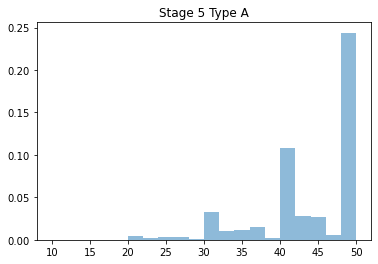

In [10]:
plt.hist(stage_5_type_a, bins=20, density=True, label='Type A', alpha=0.5)
plt.title("Stage 5 Type A");


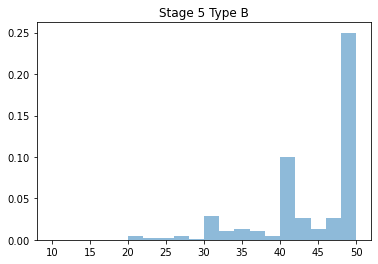

In [11]:
plt.hist(stage_5_type_b, bins=20, density=True, label='Type B', alpha=0.5)
plt.title("Stage 5 Type B");

## Comparing all 3 types of pipeline - 3 stage, 4 stage, 5 stage (Type A and B)

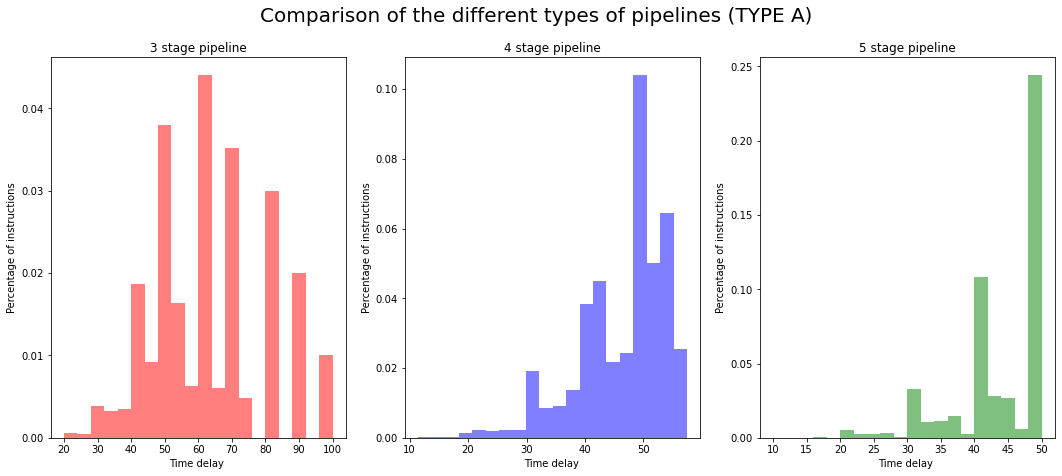

In [12]:
''' Plotting the results for the different types of pipelines (Type A)'''

plt.figure(figsize=(18, 7))
plt.suptitle("Comparison of the different types of pipelines (TYPE A)", fontsize=20)


plt.subplot(1, 3, 1)
plt.hist(stage_3_type_a, weights=np.ones(len(stage_3_type_a)) / len(stage_3_type_a), bins=20, density=True, label='Type A', alpha=0.5, color='red')
plt.xlabel('Time delay ')
plt.ylabel('Percentage of instructions')
plt.title('3 stage pipeline')


plt.subplot(1, 3, 2)
plt.hist(stage_4_type_a, weights=np.ones(len(stage_4_type_a)) / len(stage_4_type_a), bins=20, density=True, label='Type A', alpha=0.5, color='blue')
plt.xlabel('Time delay ')
plt.ylabel('Percentage of instructions')
plt.title('4 stage pipeline')


plt.subplot(1, 3, 3)
plt.hist(stage_5_type_a, weights=np.ones(len(stage_5_type_a)) / len(stage_5_type_a), bins=20, density=True, label='Type A', alpha=0.5, color='green')
plt.xlabel('Time delay ')
plt.ylabel('Percentage of instructions')
plt.title('5 stage pipeline');

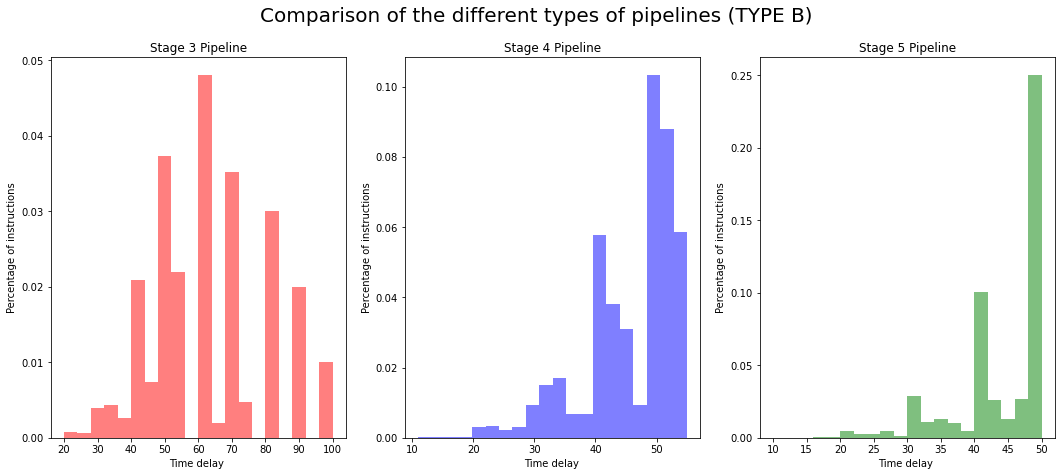

In [13]:
''' Plotting the results for the different types of pipelines (Type B) '''

plt.figure(figsize=(18, 7))
plt.suptitl

In [ ]:
e("Comparison of the different types of pipelines (TYPE B)", fontsize=20)

plt.subplot(1, 3, 1)
plt.hist(stage_3_type_b, weights=np.ones(len(stage_3_type_b)) / len(stage_3_type_b), bins=20, density=True, label='Type A', alpha=0.5, color='red')
plt.xlabel('Time delay ')
plt.ylabel('Percentage of instructions')
plt.title('Stage 3 Pipeline')


plt.subplot(1, 3, 2)
plt.hist(stage_4_type_b, weights=np.ones(len(stage_4_type_b)) / len(stage_4_type_b), bins=20, density=True, label='Type A', alpha=0.5, color='blue')
plt.xlabel('Time delay ')
plt.ylabel('Percentage of instructions')
plt.title('Stage 4 Pipeline')

plt.subplot(1, 3, 3)
plt.hist(stage_5_type_b, weights=np.ones(len(stage_5_type_b)) / len(stage_5_type_b), bins=20, density=True, label='Type A', alpha=0.5, color='green')
plt.xlabel('Time delay ')
plt.ylabel('Percentage of instructions')
plt.title('Stage 5 Pipeline');


<center> Thank you for your time  ! 😃